# demo pandas profiling - optional tool 

In [4]:
import pandas_profiling

In [8]:
cd Documents/

/Users/siandavies/Documents


In [10]:
import pandas as pd 

In [11]:
df=pd.read_csv('customer_churn.csv')

In [12]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.9.7.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 19.6.0
Version          : Darwin Kernel Version 19.6.0: Tue Jun 22 19:49:55 PDT 2021; root:xnu-6153.141.35~1/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_GB.UTF-8
LOCALE           : en_GB.UTF-8

pandas           : 1.3.5
numpy            : 1.21.2
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.7.1
html5lib         : None
pymysql          : 1.0.2
psycopg2         : None
jinja2           : 3.0.2
IPython          : 7.29.0
pandas_datareader: None
bs4              : 

# Get Unit 4 data in as 'data'

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4


In [3]:
cd CaseStudies/other_data/

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4/CaseStudies/other_data


In [4]:
ls

customer_churn.csv                lesson_4.05_data.csv
googleplaystore.csv               strokes_data.csv
googleplaystore_user_reviews.csv  unit4.csv


In [5]:
data=pd.read_csv('unit4.csv')

In [6]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

## split the data into numericals and categoricals for EDA 

In [30]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

### data quality check 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [37]:
# count duplicates 
data.duplicated().sum()

1

In [39]:
# see duplicates 
data[data.duplicated(keep=False)]

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
36109,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0
49464,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0


In [8]:
# drop duplicate row 
data=data.drop_duplicates()

In [ ]:
# drop nulls and any obvious columns to drop ? 

### after removing rows - reset index 

In [43]:
data.reset_index(drop=True,inplace=True)

### see all columns, EDA on numericals and categoricals 

In [9]:
pd.set_option('display.max_columns',None)

In [47]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [10]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

# Numeric columns handling 

In [50]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


## create a nulls df which summarises % of nulls per column 

In [63]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num)) # work on the numericals first 
# eg 3 rows nulls / 4 rows data 

In [64]:
nulls.reset_index(inplace=True)

In [66]:
nulls.columns=['column_name','percentage_nulls']
nulls.sort_values(by='percentage_nulls',ascending=False)
# this is your data quality snapshot 

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


## fill in nulls 
- with a fixed value 
- with interpolation 

In [68]:
d_num.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,70386.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.878257,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,1.855265,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


In [74]:
d_num['INCOME'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [75]:
d_num['INCOME'].value_counts()

5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

In [77]:
d_num['INCOME'].median()

4.0

In [78]:
d_num['INCOME'].mean()

3.8782570397522234

<AxesSubplot:>

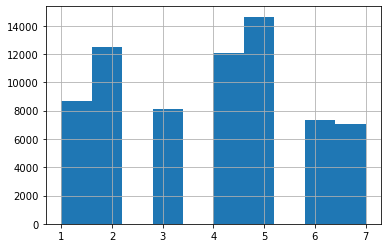

In [79]:
d_num['INCOME'].hist()

In [80]:
d_num.head(10)

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865
5,0,NaN,807,899,3,3,364,410,406,454,15619,35,15,6,12,9702,4,6.0,12.750000
6,6001,4.0,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,14,4.0,7.642857
7,0,2.0,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,5,6.0,6.200000
8,0,3.0,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,11,8.0,18.090909
9,3211,NaN,565,581,3,3,291,329,311,332,10517,28,11,4,9,9702,3,7.0,9.333333


In [86]:
zeros_d=d_num['INCOME'].fillna(0)

In [87]:
zeros_d.head(10)

0    0.0
1    6.0
2    3.0
3    1.0
4    3.0
5    0.0
6    4.0
7    2.0
8    3.0
9    0.0
Name: INCOME, dtype: float64

<AxesSubplot:>

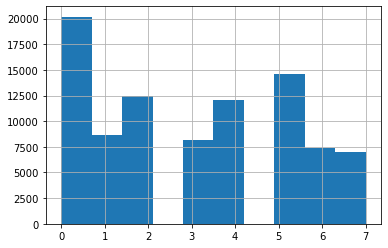

In [88]:
zeros_d.hist()

### after picking your method - apply to your dataframe 

In [94]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [26]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

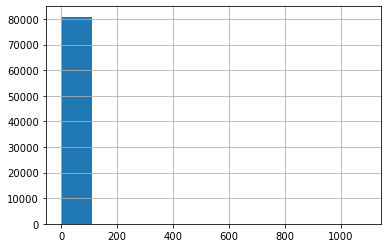

In [95]:
d_num['TIMELAG'].hist()

In [102]:
d_num['TIMELAG'].unique()

array([4.000e+00, 1.800e+01, 1.200e+01, 9.000e+00, 1.400e+01, 6.000e+00,
       8.000e+00, 7.000e+00,       nan, 3.000e+00, 5.000e+00, 1.000e+00,
       2.300e+01, 1.700e+01, 2.000e+00, 1.600e+01, 1.500e+01, 1.100e+01,
       1.000e+01, 2.000e+01, 0.000e+00, 2.100e+01, 1.300e+01, 1.900e+01,
       2.500e+01, 2.600e+01, 2.800e+01, 3.100e+01, 2.200e+01, 3.500e+01,
       2.700e+01, 3.400e+01, 4.200e+01, 2.900e+01, 3.000e+01, 4.900e+01,
       2.400e+01, 6.200e+01, 3.700e+01, 3.600e+01, 4.400e+01, 4.600e+01,
       3.900e+01, 4.500e+01, 3.800e+01, 3.300e+01, 4.800e+01, 4.700e+01,
       4.300e+01, 4.000e+01, 9.000e+01, 5.600e+01, 3.200e+01, 5.700e+01,
       5.800e+01, 5.900e+01, 4.100e+01, 5.000e+01, 5.100e+01, 5.500e+01,
       6.100e+01, 5.400e+01, 8.900e+01, 1.044e+03, 5.300e+01, 4.420e+02,
       5.200e+01, 1.088e+03])

In [99]:
d_num.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.014034,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,2.297785,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,1.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,3.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


In [100]:
d_num['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

In [103]:
timelag=d_num['TIMELAG']

In [107]:
timelag=timelag[timelag<60]

<AxesSubplot:>

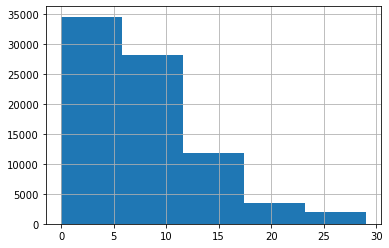

In [115]:
timelag.hist(bins=5)

In [110]:
d_num.columns

Index(['DOB', 'INCOME', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3', 'IC4',
       'IC5', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12', 'MAXADATE',
       'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

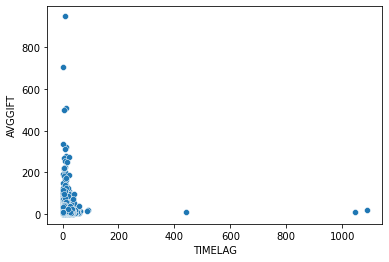

In [113]:
sns.scatterplot(data=d_num, x="TIMELAG", y="AVGGIFT");

<AxesSubplot:xlabel='TIMELAG'>

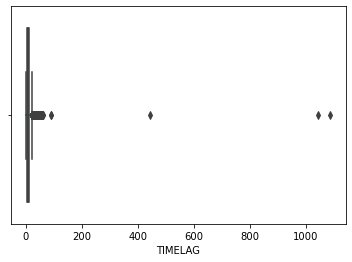

In [114]:
sns.boxplot(d_num['TIMELAG']);

In [ ]:
# removing outliers then scatter plot again 
- IQR 
-upper_limit 
- exclude anything over upper limit 
OR FILTER BY A FIXED LIMIT 

In [ ]:
# pd.cut or pd.qcut 
# OR create function to bucket values 


## correlation 

In [ ]:
- correlation matrix (with or without mask, consider colours )
- joint plot 
- pair plot 
- scatter plot 
- box plot 

# Categorical columns 

In [31]:
d_cat.columns

Index(['STATE', 'PVASTATE', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN', 'HOMEOWNR',
       'VETERANS', 'RFA_2'],
      dtype='object')

In [32]:
d_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90568 entries, 0 to 90568
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     90568 non-null  object
 1   PVASTATE  90568 non-null  object
 2   MDMAUD    90568 non-null  object
 3   RECP3     90568 non-null  object
 4   GENDER    90568 non-null  object
 5   DOMAIN    90568 non-null  object
 6   HOMEOWNR  90568 non-null  object
 7   VETERANS  90568 non-null  object
 8   RFA_2     90568 non-null  object
dtypes: object(9)
memory usage: 6.9+ MB


### common things to check 
- blanks and nulls and any other weird values 
- relevance - from the cat to the target 
    - chi squared test 
- cardinality (how many diff values are in that column, are there some small ones which can be grouped)

In [33]:
d_cat['MDMAUD'].unique()

array(['XXXX', 'C1CM', 'D1CM', 'L1CM', 'C2CM', 'D2CM', 'I1CM', 'I2MM',
       'I1LM', 'L2CM', 'C1MM', 'C1LM', 'D5CM', 'I2CM', 'D5TM', 'L1LM',
       'D5MM', 'C2MM', 'I5CM', 'C5CM', 'I5MM', 'C2LM', 'C5MM', 'D2MM',
       'L1MM', 'C5TM', 'L2TM'], dtype=object)

In [37]:
d_cat['MDMAUD'].value_counts()

not_major_donor    90289
major_donor          279
Name: MDMAUD, dtype: int64

In [22]:
major=data[(data.MDMAUD != 'XXXX')] # looking at major donors only 

In [23]:
major.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,279.000000,211.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,279.000000
mean,2284.824373,4.620853,1560.057348,1659.580645,5.243728,4.799283,419.763441,475.767025,470.770609,522.548387,20949.831541,89.534050,24.068100,6.146953,28.351254,9701.673835,15.236559,8.083032,76.561089
std,1830.291615,1.990057,1308.499175,1301.707619,2.790932,2.623058,234.541067,254.266245,218.951568,231.667766,13169.703884,30.273776,8.152703,1.230568,7.382065,5.448027,16.941328,7.267929,81.977787
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,6.000000,1.000000,6.000000,9611.000000,1.000000,0.000000,8.904762
25%,653.500000,3.000000,677.500000,717.000000,3.000000,3.000000,258.500000,300.500000,314.500000,358.500000,13060.500000,68.000000,18.000000,6.000000,25.000000,9702.000000,7.000000,4.000000,42.635088
50%,2201.000000,5.000000,1125.000000,1235.000000,5.000000,4.000000,358.000000,426.000000,426.000000,487.000000,17408.000000,94.000000,25.000000,6.000000,29.000000,9702.000000,11.000000,6.000000,61.111111
75%,3651.500000,6.000000,1929.500000,2144.500000,6.000000,6.000000,513.000000,558.000000,572.500000,618.000000,24688.000000,113.000000,30.000000,6.000000,33.000000,9702.000000,19.000000,10.000000,87.875000
max,6604.000000,7.000000,5916.000000,5800.000000,13.000000,13.000000,1287.000000,1500.000000,1130.000000,1246.000000,88847.000000,158.000000,41.000000,12.000000,50.000000,9702.000000,237.000000,40.000000,948.500000


In [24]:
d_num['AVGGIFT'].mean()

13.428568110050856

In [36]:
# conclusion - replace value MDMAUD with major_donor, not_major_donor
def grp_mdmaud(x): 
    if x == 'XXXX':
        return 'not_major_donor'
    else:
        return 'major_donor'
d_cat['MDMAUD']=list(map(grp_mdmaud,d_cat['MDMAUD']))

In [35]:
grp_mdmaud('XXXX')

'not_major_donor'

In [39]:
d_cat['STATE'].value_counts()

CA    16283
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

how to establish relevance 
- box plot , cat plot with jitter , map (in tableau or in python eg folium )
- groupby state with mean, median,

In [40]:
geo=data[['STATE','AVGGIFT']]

In [43]:
geo.to_csv('statewithgift.csv')

In [55]:
grouping=data.groupby("STATE").agg({"AVGGIFT": [np.mean, np.median, 'count']})

In [57]:
grouping.columns=['mean','median','count']

In [59]:
grouping.sort_values(by='mean', ascending=False)

,mean,median,count
STATE,,,
AS,30.000000,30.000000,1
VT,22.100168,17.944444,6
DC,20.000000,20.000000,1
DE,17.300000,11.833333,3
AK,17.261347,15.000000,275
VA,16.830475,12.607143,54
CT,15.738928,11.550000,20
HI,15.479504,13.750000,423
CA,14.683392,12.531250,16283


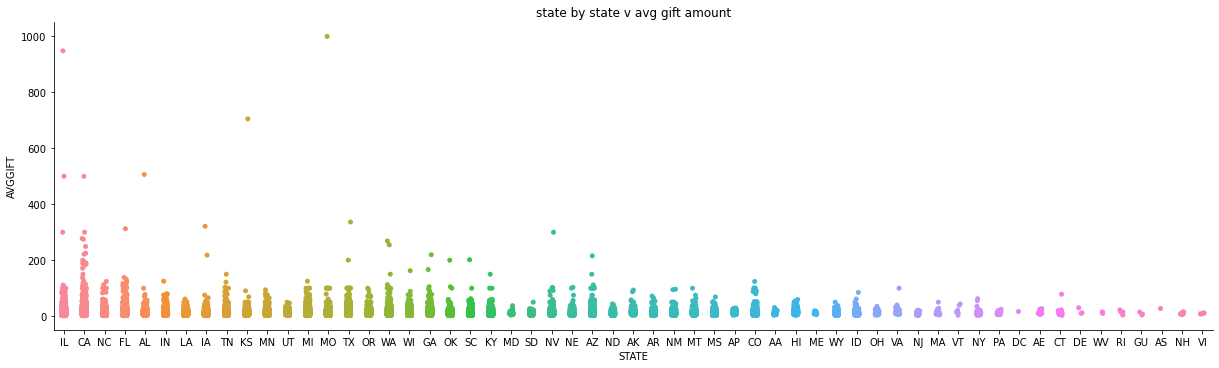

In [66]:
ax=sns.catplot(data=data,x='STATE',y='AVGGIFT').set(title='state by state v avg gift amount')
ax.fig.set_figwidth(20)

## chi squared test 

- looking for correlation between categories
- create a crosstab between the columns 
- run the test 
- evaluate the results 

In [67]:
from scipy.stats import chi2_contingency
# just an example conceptually 

In [68]:
d_cat.columns

Index(['STATE', 'PVASTATE', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN', 'HOMEOWNR',
       'VETERANS', 'RFA_2'],
      dtype='object')

In [70]:
data_crosstab=pd.crosstab(d_cat['HOMEOWNR'], d_cat['RFA_2'], margins = False)

In [71]:
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
HOMEOWNR,,,,,,,,,,,,,,
,1009,6727,2882,1010,2351,1087,508,1615,759,354,1079,894,534,241
H,2522,16179,6771,2596,5800,2413,1184,3970,1838,776,2276,1901,980,440
U,1136,6300,2354,1075,2247,910,575,1659,755,295,1094,852,437,183


In [72]:
chi2_contingency(data_crosstab, correction=False)

(175.3605988661588,
 4.1538789000941835e-24,
 26,
 array([[ 1084.71369579,  6788.11831994,  2790.6915246 ,  1087.96760445,
          2416.72445014,  1024.98122957,   526.90078173,  1683.66531225,
           779.07870329,   331.20141772,  1034.04568943,   847.64320731,
           453.45541472,   200.81264906],
        [ 2558.27535112, 16009.6400053 ,  6581.78961664,  2565.94962901,
          5699.79582192,  2417.39753555,  1242.68485558,  3970.8906457 ,
          1837.4413921 ,   781.13185673,  2438.77588111,  1999.14939051,
          1069.46544033,   473.61257839],
        [ 1024.0109531 ,  6408.24167476,  2634.51885876,  1027.08276654,
          2281.47972794,   967.62123487,   497.41436269,  1589.44404205,
           735.4799046 ,   312.66672555,   976.17842947,   800.20740217,
           428.07914495,   189.57477255]]))

In [ ]:
#this returns 4 results in this order:
#(chi-square statistic,
# p value, 
# degrees of freedom, 
# expected frequencies matrix)